In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'2.2.0'

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [5]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_dataset = train_datagen.flow_from_directory(train_dir,
                                                    shuffle=True,
                                                    batch_size=BATCH_SIZE,
                                                    target_size=IMG_SIZE)

Found 2000 images belonging to 2 classes.


In [7]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
validation_dataset = validation_datagen.flow_from_directory(validation_dir,
                                                              shuffle=True,
                                                              batch_size=BATCH_SIZE,
                                                              target_size=IMG_SIZE)

Found 1000 images belonging to 2 classes.


In [8]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [9]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [10]:
image_batch, label_batch = next(train_dataset)
base_model(image_batch).shape

TensorShape([32, 5, 5, 1280])

## 1. Transfer Learning

In [11]:
base_model.trainable = False

In [12]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
print(inputs.shape)
x = base_model(inputs)
print(x.shape)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
print(x.shape)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)
print(outputs.shape)

(None, 160, 160, 3)
(None, 5, 5, 1280)
(None, 1280)
(None, 2)


In [13]:
# model = tf.keras.Model(inputs, base_model) # Error 1
# model = tf.keras.Model(inputs, base_model.output) # Error 2
model = tf.keras.Model(inputs, outputs)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])

In [16]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 47s 745ms/step - loss: 0.8288 - accuracy: 0.5235 - val_loss: 0.7406 - val_accuracy: 0.5600
Epoch 2/10
63/63 [==============================] - 4s 67ms/step - loss: 0.7098 - accuracy: 0.5825 - val_loss: 0.6783 - val_accuracy: 0.6160
Epoch 3/10
63/63 [==============================] - 4s 67ms/step - loss: 0.6539 - accuracy: 0.6245 - val_loss: 0.6405 - val_accuracy: 0.6360ss: 0.6519 
Epoch 4/10
63/63 [==============================] - 4s 67ms/step - loss: 0.6188 - accuracy: 0.6620 - val_loss: 0.6087 - val_accuracy: 0.6600
Epoch 5/10
63/63 [==============================] - 4s 67ms/step - loss: 0.5917 - accuracy: 0.6840 - val_loss: 0.5879 - val_accuracy: 0.6810
Epoch 6/10
63/63 [==============================] - 4s 67ms/step - loss: 0.5736 - accuracy: 0.6945 - val_loss: 0.5715 - val_accuracy: 0.7060
Epoch 7/10
63/63 [==============================] - 4s 67ms/step - loss: 0.5580 - accuracy: 0.7150 - val_loss: 0.5611 - val_accuracy: 0.7160


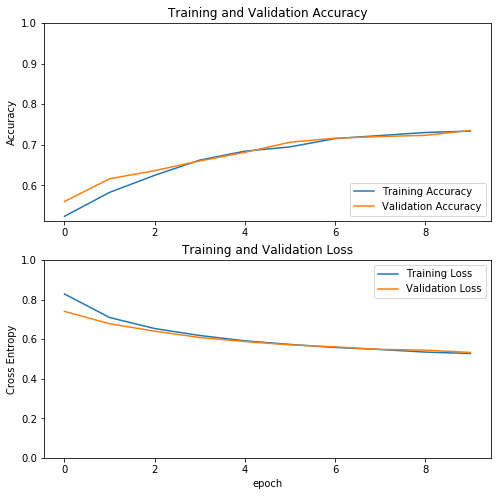

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()